In [6]:
%reset -f
%matplotlib inline
import matplotlib as mpl
import numpy as np
from numpy import array as a
import matplotlib.pyplot as plt
import numpy.random as rng
import itertools as it
from scipy.special import expit as sigmoid
np.set_printoptions(precision = 2, suppress = True)
import time
rng.seed(int(time.time())) # seed the random number generator

from IPython.html.widgets import interact

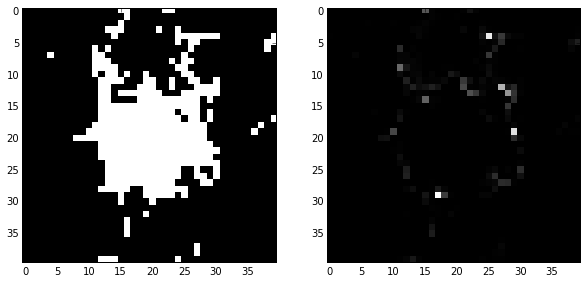

In [7]:
in_circle = lambda x, y: 1 if x**2 + y**2 <= 100 else -1

def do_plot(phi, alph, sign_phi=False):
    #for i, x in enumerate(dataset):
    #    plt.plot(x[0], x[1], marker='s', c=((np.sign(phi[i])+1)/2, 0, 0))
    
    def view_images(i):
        plt.figure(figsize=(10,10))
        plt.set_cmap('gray')
        plt.subplot(121)
        # should fix up the axes
        if sign_phi:
            plt.imshow(np.sign(phi[i].reshape(40,40)), interpolation='nearest')
        else:
            plt.imshow((phi[i].reshape(40,40)), interpolation='nearest')
        plt.subplot(122)
        plt.imshow((alph[i].reshape(40,40)), interpolation='nearest')
        plt.show()
    interact(view_images, i=(0, len(all_phi)-1))

dataset = a([ a([x,y,1]) for x, y in it.product(range(-20, 20), range(-20, 20)) ])
ts = a( [in_circle(x, y) for x, y, _ in dataset] )

αs = np.ones(dataset.shape[0])
phi = np.zeros(dataset.shape[0])

ITERATIONS = 5000
all_phi = []
all_alph = []
for i in range(ITERATIONS):
    perceptron_weights = rng.normal(size=3)
    # let's give the bias a bit of a wider range
    perceptron_weights[2] = rng.normal(scale=10)
    y = np.sign(dataset.dot(perceptron_weights))
    W = np.log( np.sum(αs[y == ts]) / np.sum(αs[y != ts]) )
    αs = αs * np.exp(-W * ts * y)
    phi += W * y
    
    if i%10 == 0: # don't save them all
        all_alph.append(αs.copy())
        all_phi.append((phi.copy()))
    
do_plot(all_phi, all_alph, sign_phi=True)